# Fitting a function to data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
import ipywidgets as widgets
from IPython.display import display
import random

In [7]:
# make the random numbers predictable
#np.random.seed(46)
# define the function to fit
def func(x, a, b):
    return a * x + b

# set the parameter for the function
a = 2
b = 1

def plot_data_with_noise(noise_level, n):
    x = np.linspace(0, 10,n)
    y = func(x,a,b) 
    # noise = np.random.normal(loc=0.0, scale= y.max()/100* noise_level, size=len(x))
    # alternatively, you can use the following line to generate the noise using the random module
    noise = [random.gauss(0, y.max()/100* noise_level) for i in range(len(x))]
    y_exp = y + noise
    fig, axs = plt.subplots(2,1, figsize=(4, 4), gridspec_kw={'height_ratios': [3, 1]})
    # set the size of subplots to 6,8 and 6,4
    axs[0].plot(x, y, label='data without noise', color = 'black')
    axs[0].scatter(x, y_exp, label='data with noise')
    # plot mean and standard deviation in the noise subplot
    axs[1].plot(x, np.mean(noise)*np.ones(len(x)), label='mean', color = 'black')
    axs[1].plot(x, np.mean(noise)+2*np.std(noise)*np.ones(len(x)), label='mean + std', color = 'red')
    axs[1].plot(x, np.mean(noise)-2*np.std(noise)*np.ones(len(x)), label='mean - std', color = 'red')
    axs[1].scatter(x, noise, label= 'noise')
    axs[0].set_ylabel('y')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('noise')
    
    axs[0].legend()
    plt.tight_layout()
    plt.show()
    # make a histogram of the noise
    fig, axs = plt.subplots(1,1, figsize=(4, 4))
    axs.hist(noise, bins = 10)

# make sliders for the noise level and the number of points
noise_level_slider = widgets.FloatSlider(value=5, min =0, max = 50, step =1 , description='noise level', readout_format='.0f')
n_slider = widgets.IntSlider(value=20, min =3, max = 500, step =1 , description='n', readout_format='.0f')

plot_widget = widgets.interactive(plot_data_with_noise,  noise_level = noise_level_slider, n = n_slider)
display(plot_widget)
# plot_data_with_noise(x, y, noise_level)


interactive(children=(FloatSlider(value=5.0, description='noise level', max=50.0, readout_format='.0f', step=1…

a =, 2.0
b =, 1.0
noise level = 5.0 %
a_fit =, 2.07 +/- 0.07
b_fit =, 0.71 +/- 0.40


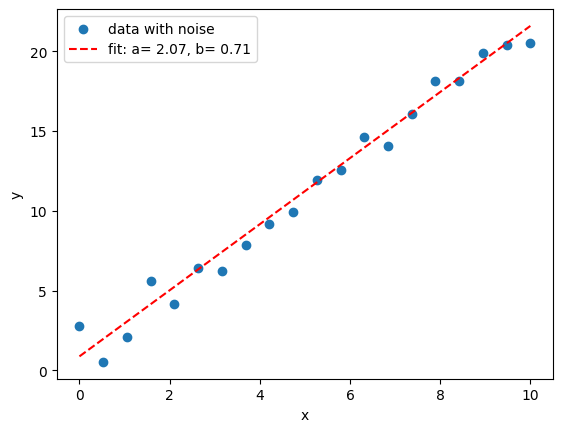

In [6]:
# assign the values of the slider to the noise_level variable
n = n_slider.value
noise_level = noise_level_slider.value
x = np.linspace(0, 10,n)
y = func(x,a,b)
noise1 = np.random.normal(loc=0.0, scale= y.max()/100* noise_level, size=len(x)) # numpy.random
noise_ss = ss.norm.rvs(loc=0.0, scale = y.max()/100* noise_level, size=len(x)) # scipy.stats
y_exp = y + noise1
y_exp_ss = y + noise_ss
# plot data
# fit the function
a_init = 1
b_init = 1
popt, pcov = curve_fit(func, x, y_exp, p0=(a_init, b_init))
# print the values for a and b 
print(f'a =, {a:.1f}')
print(f'b =, {b:.1f}')
print(f'noise level = {noise_level:.1f} %')
# print the fit parameters
print(f'a_fit =, {popt[0]:.2f} +/- {np.sqrt(pcov[0,0]):.2f}')
print(f'b_fit =, {popt[1]:.2f} +/- {np.sqrt(pcov[1,1]):.2f}')

# plot the fit
# plt.scatter(x, y, label='data')
plt.scatter(x, y_exp, label='data with noise')
# plt.scatter(x, y_exp_ss, label='data with noise scipy.stats')
# include the the error of the fit parameters in the legend
plt.plot(x, func(x, popt[0]+pcov[0,0], popt[1]+pcov[1,1]), 'r--', label='fit: a=%5.2f, b=%5.2f' % tuple(popt+pcov[0,0]))
# label the axes
plt.xlabel('x')
plt.ylabel('y')
# show the plot
plt.legend()
plt.show()


## Watermark

In [35]:
%load_ext watermark
%watermark -v
%watermark --conda
%watermark --iversions
%watermark -v -m -p numpy,scipy,matplotlib,pandas,watermark
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.7.0

conda environment: python3915

ipywidgets: 8.0.4
matplotlib: 3.6.2
pandas    : 1.5.2
scipy     : 1.8.1
numpy     : 1.23.5

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.7.0

numpy     : 1.23.5
scipy     : 1.8.1
matplotlib: 3.6.2
pandas    : 1.5.2
watermark : 2.3.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Sun Mar 26 2023 18:07:41Mitteleuropäische Sommerzeit

